In [1]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
import argparse

def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0 / (1 + np.exp(-x))

def predict(X, W):
    # take the dot product between our features and weight matrix
    preds = sigmoid_activation(X.dot(W))
    
    # apply a step function to threshold the outputs to binary class labels
    preds[preds <= 0.5] = 0
    preds[preds > 0.5] = 1
    
    return preds

In [2]:
ap = argparse.ArgumentParser()
ap.add_argument("-e", "--epochs", type=float, default=100, help="# of epochs")
ap.add_argument("-a", "--alpha", type=float, default=0.01, help="learning rate")
# args = vars(ap.parse_args())

_StoreAction(option_strings=['-a', '--alpha'], dest='alpha', nargs=None, const=None, default=0.01, type=<class 'float'>, choices=None, help='learning rate', metavar=None)

In [36]:
# generate a 2-class classification problem with 1,000 data points, where each data point is a 2D feature vector
(X, y) = make_blobs(n_samples=1000, n_features=2, centers=2, cluster_std=1.5, random_state=1)

y = y.reshape((y.shape[0], 1))

# insert a column of 1's as the last entryu in the feature matrix -- this little trick allows us to treat the bias as a trainable paramenter within the weight matrix
X = np.c_[X, np.ones(X.shape[0])]

(trainX, testX, trainY, testY) = train_test_split(X, y, test_size=0.5, random_state=42)


[[1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]


In [45]:
# initalize our weight matrix and list of losses
print("[INFO] training...")
W = np.random.randn(X.shape[1], 1)

losses = []

# loop over the desired number of epochs
for epoch in np.arange(0, 100):
    preds = sigmoid_activation(trainX.dot(W))
    
    error = preds - trainY
    loss = np.sum(error ** 2)
    losses.append(loss)
    
    gradient = trainX.T.dot(error)
    
    W += -0.01 * gradient
    
    if epoch == 0 or (epoch + 1) % 5 == 0:
        print("[INFO] epoch={}, lose={:.7f}".format(int(epoch + 1), loss))
        
print("[INFO] evaluating...")
preds = predict(testX, W)
print(classification_report(testY, preds))
print(W)

[INFO] training...
[INFO] epoch=1, lose=14.8491157
[INFO] epoch=5, lose=0.1444728
[INFO] epoch=10, lose=0.1339398
[INFO] epoch=15, lose=0.1221920
[INFO] epoch=20, lose=0.1119377
[INFO] epoch=25, lose=0.1032242
[INFO] epoch=30, lose=0.0957756
[INFO] epoch=35, lose=0.0893369
[INFO] epoch=40, lose=0.0837100
[INFO] epoch=45, lose=0.0787444
[INFO] epoch=50, lose=0.0743255
[INFO] epoch=55, lose=0.0703639
[INFO] epoch=60, lose=0.0667895
[INFO] epoch=65, lose=0.0635462
[INFO] epoch=70, lose=0.0605885
[INFO] epoch=75, lose=0.0578790
[INFO] epoch=80, lose=0.0553871
[INFO] epoch=85, lose=0.0530868
[INFO] epoch=90, lose=0.0509564
[INFO] epoch=95, lose=0.0489773
[INFO] epoch=100, lose=0.0471338
[INFO] evaluating...
             precision    recall  f1-score   support

          0       1.00      1.00      1.00       250
          1       1.00      1.00      1.00       250

avg / total       1.00      1.00      1.00       500

[[-0.40270334]
 [-2.88860991]
 [-1.16224432]]


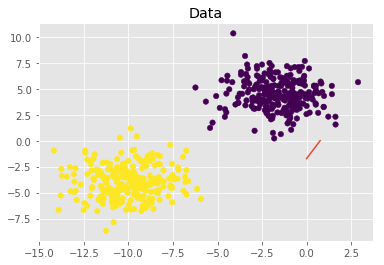

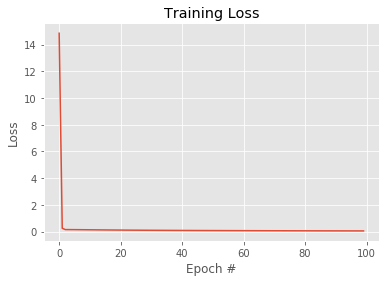

In [48]:
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(testX[:, 0], testX[:, 1], marker="o", c=testY.flatten(), s=30)
plt.plot([W[0]+W[2],0], [0, W[1]+W[2]])

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
